

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    مسافران به دلایل مختلفی بلیط رزرو میکنند و ممکن است به دلایل دیگر آن ها را لغو کنند. شرکتی مانند مستربلیط که بلیط‌های اتوبوس، هواپیما و ... ارائه می‌کند با تعداد آژانس مسافربری مانند رویال سفر و هما قرارداد بسته و به ازای هر بلیطی که بفروشد، مبلغی را تحت عنوان کمسیون، سود میکند!
    <br>
    اما در مقابل، هنگامی که مسافران بلیط خود را کنسل می‌کنند، مستربلیط باید مبلغی را تحت عنوان جریمه به آژانس‌های مسافربری بپردازد. از آن‌جایی که سیاست مستربلیط بر این است که بخشی از جریمه را از خود مسافر بستاند، بنابراین میخواهیم پیشبینی کنیم که کِی، یک مسافر بلیط خود را لغو میکند.
    <br>
    قیمت‌گذاری مستربلیط برای جریمه مسافران به این شکل است :
    <br>
    بلیط تا 1 ساعت بعد از صدور (چنانچه بیشتر از 2 ساعت به حرکت مانده باشد) بدون جریمه، تا 1 ساعت قبل از حرکت با 10% جریمه و پس از آن با 50% جریمه به صورت اینترنتی قابل کنسل می باشد.
    
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
وارد کردن کتابخانه‌های مورد نیاز
</font>
</h2>



In [4]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np 
from pandas_profiling import ProfileReport

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTENC
from flaml import AutoML


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معرفی مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    مجموعه داده آموزشی که در فایل <code>train_data.csv</code> قرار دارد، شامل ۱۳۵۰۰ سطر است که در جدول زیر، توضیحات هر ستون آمده است.
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|:------:|:---:|
|Created|زمان ثبت بلیط|
|DepartureTime|زمان حرکت|
|BillID|شناسه خرید|
|TicketID|شناسه بلیط|
|ReserveStatus|وضعیت رزرواسیون مشتری که به دلایلی از سمت مستربلیط، معنی اعداد این ستون روشن نشده است!|
|UserID|شناسه کاربری|
|Male|آیا بلیط متعلق به زن است یا مرد|
|Price|قیمت بلیط بدون تخفیف|
|CouponDiscount|تخفیفی که شخص روی بلیط اعمال کرده است|
|From|مبدا سفر|
|To|مقصد سفر|
|Domestic|آیا سفر، داخلی است یا خارجی|
|VehicleType|جزئیات وسیله نقلیه را مشخص می‌کند|
|VehicleClass|آیا وسیله نقلیه، فرست‌کلس است یا نه|
|TripReason|دلیل سفر (کاری و غیر کاری)|
|Vehicle|نوع وسیله نقلیه|
|HashPassportNumber_p|هش‌شده شماره پاسپورت|
|HashEmail|هش‌شده ایمیل|
|BuyerMobile|هش‌شده شماره موبایل|
|NationalCode|هش‌شده شماره‌ملی|
|target|درصدی که مسافر باید جریمه بپردازد (ستون هدف)|
</font>
</div>
</center>

<br>
<br>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در کنار مجموعه داده آموزش، مجموعه دیگری از اطلاعات کاربران را داریم که توضیحات آن را در جدول زیر مشاهده می‌کنیم.
</font>
</p>


<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|:------:|:---:|
|BuyerMobile|هش‌شده شماره موبایل|
|PreferedServiceMap|نام نوع سرویس یا خدمت ارجح‌ داده‌شده توسط کاربر|
|BuyingInterval|میانگین فاصله بین خریدهای کاربر بر اساس روز (درصورتی که یک خرید بیشتر نباشد عدد 0)|
|FrequencyStage|تعداد خریدهای کاربر|
|From|پرتکرارترین مبدا ثبت‌شده در خریدهای کاربر|

</font>
</div>
</center>



<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در استفاده از داده‌ها، :
    <ul dir=rtl style="direction: rtl; text-align: justify;">
        <li>مسافران با استفاده هش شماره موبایل‌شان از یکدیگر تفکیک می شوند. بنابراین از ستون <code>BuyerMobile</code> میتوانیم برای اتصال دو مجموعه داده استفاده می کنیم.</li>     
        <li>در هر خرید، مسافر می‌تواند بیشتر از ۱ بلیط خریداری کند. بنابراین با یک <code>BillID</code> ممکن است بیش از یک <code>TicketID</code> دیده  شود!</li>
    </ul>
</font>
</p>


In [12]:
df = pd.read_csv('train_data.csv')

In [23]:
df

,Created,DepartureTime,BillID,TicketID,ReserveStatus,UserID,Male,Price,CouponDiscount,From,To,Domestic,VehicleType,VehicleClass,TripReason,Vehicle,HashPassportNumber_p,HashEmail,BuyerMobile,NationalCode,target
0,2022-03-31 18:02:23.787,2022-04-03 21:00:00.000,36747369,1031542.0,5,769900.0,False,6000000.0,0.0,تهران,مشهد,1,NaN,False,NaN,Plane,NaN,NaN,396856962642,946582672,10%
1,2022-05-17 22:05:09.693,2022-05-26 17:00:00.000,37370235,2786787.0,4,250646.0,False,3410500.0,0.0,تهران,مشهد,1,4ستاره 4تخته نوين,NaN,NaN,Train,NaN,NaN,263373860744,264039157,free
2,2022-08-29 21:36:16.417,2022-09-06 15:55:00.000,38911942,2977666.0,4,892493.0,True,2718500.0,0.0,مشهد,تهران,1,4 ستاره 4 تخته سروش,NaN,NaN,Train,NaN,a251c938f63c44b3f121558b1bd6faf24c3c7024e0e2f2...,836531213515,40307748,free
3,2022-02-27 07:16:27.157,2022-03-19 15:20:00.000,36198455,2663135.0,4,NaN,True,3247000.0,0.0,بندرعباس,تهران,1,4ستاره4تخته غزال,NaN,NaN,Train,NaN,NaN,996258900076,1112341,10%
4,2022-07-23 14:37:30.550,2022-08-08 19:30:00.000,38387519,1065104.0,5,847059.0,True,42460000.0,0.0,نجف,اصفهان,0,بوئینگ 737,False,Int,InternationalPlane,093d26f101187c9c755a4a9cde7030a8ccff18215c9ad0...,NaN,601992127142,725979974,10%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13495,2022-01-08 08:17:17.043,2022-01-12 15:45:00.000,35623875,2599398.0,4,NaN,False,3127000.0,0.0,اصفهان,مشهد,1,4ستاره4تخته سپهر,NaN,NaN,Train,NaN,NaN,681500278543,862270585,10%
13496,2022-09-24 10:01:19.490,2022-10-01 08:30:00.000,39308700,7640955.0,5,674802.0,False,1080000.0,0.0,رشت,تهران,1,25 نفره (VIP),True,NaN,Bus,NaN,9402563ffbff6ce08e619bb28dfe31ceb1244b254a19cd...,365907584807,339537531,10%
13497,2022-02-19 10:37:46.267,2022-02-25 10:33:00.000,36117220,2653130.0,4,509432.0,True,922500.0,3030.0,نقاب,تهران,1,4 ستاره اتوبوسي صبا,NaN,NaN,Train,NaN,47729311bf106fa035ccb3a0952dd24b3961cee5e29114...,396110241704,337405956,free
13498,2022-09-09 14:23:32.827,2022-09-20 21:55:00.000,39082277,2998105.0,4,652845.0,True,1319000.0,0.0,تهران,یزد,1,4 ستاره اتوبوسي نگين,NaN,NaN,Train,NaN,bf499ad3c8b861552902b1f2a54d5bb477b6c822d8bc3f...,75744190023,362894914,free


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌پردازش و مهندسی ویژگی
</font>
</h2>


In [14]:
from sklearn.model_selection import train_test_split

train , test = train_test_split(df, test_size=.2, random_state=313)

In [21]:
class Preprocessor : 
    def __init__ (self)  : 
        pass 
    
    
    def to_datetime(self, data) : 
        data[['Created', 'DepartureTime']] = data[['Created', 'DepartureTime']].apply(pd.to_datetime)             
        return data
    
    
    def merge(self, data, path='UserFeatures.csv', prev_on = 'BuyerMobile', new_on = 'BuyerMobile') :
        users = pd.read_csv(path)
        data = pd.merge(data,users, left_on='BuyerMobile', right_on='BuyerMobile')
        return data
    
    def drop_cols(self, data, useless_cols ) :
        return data.drop(useless_cols, axis=1)
        
        
    def replace (self, data, col, value) :
        data[col].replace(value, inplace=True)        
        return data
    
    def fillna(self, data, col, value) :
        data[col].fillna(value, inplace=True)
        return data
    
        
    def count_each_target_group (self, group) : 
        normalization_factor = len(group) + 1
        return group.BuyerMobile.values[0], \
                (len(group[group.target=='10%']) + 1)/normalization_factor  ,\
                (len(group[group.target=='50%']) + 1)/normalization_factor  ,\
                (len(group[group.target=='free']) + 1)/normalization_factor
    
    def extract_user_activity_history(self, data) :
        frequent_cancel_type = pd.DataFrame.from_records(
                                data.groupby('BuyerMobile').apply(self.count_each_target_group).values,
                                columns = ['BuyerMobile', '10%', '50%', 'free'])

        data = pd.merge(data,frequent_cancel_type, left_on='BuyerMobile', right_on = 'BuyerMobile')
        return data
    
    def is_family (self, rows) : 
        return (True in rows.values) and (False in rows.values)    
    
    
    def encode_cities(self, data) :
        cities = data.From.append(data.To).values
        city_encoder = LabelEncoder().fit(cities)
        self.city2idx = dict(zip(city_encoder.classes_, city_encoder.transform(city_encoder.classes_)))
        self.city2idx['iran'] = -1 
            

    def transform_cities(self, data, col) : 
        try : 
            data[col] = data[col].map(self.city2idx).fillna(self.city2idx['iran']).astype(int)
            return data
        
        except KeyError as exc:  
            print(exc)
            raise Exception('Something went wrong. Maybe this class is used for test data before fit on train data!')
            
    def encode_bool_cols (self, data) : 
        bool_cols = data.select_dtypes('bool').columns
        for col in bool_cols : 
            data[col].replace({True:1, False:0}, inplace=True,)
            
        return data
    
    def encode_vehicle(self, data) :
        vehicles = data.Vehicle.values
        vehcile_encoder = LabelEncoder().fit(vehicles)
        self.vehicle2idx = dict(zip(vehcile_encoder.classes_, vehcile_encoder.transform(vehcile_encoder.classes_)))
        
    def transform_vehicle(self, data) : 
        try : 
            data['Vehicle'] = data.Vehicle.map(self.vehicle2idx).fillna(self.vehicle2idx['Bus']).astype(int)
            return data
        
        except KeyError as exc:  
            raise Exception('Something went wrong. Maybe this class is used for test data before fit on train data!')
          
        
    
    def transform(self, df, is_train) : 
        data = self.to_datetime(df) 
        
        
        data = self.merge(data, 'UserFeatures.csv', prev_on = 'BuyerMobile', new_on = 'BuyerMobile') 
        
        
        data = self.drop_cols(data, useless_cols = ['UserID', 'HashPassportNumber_p', 'HashEmail', 'NationalCode', \
                'VehicleType', 'VehicleClass', 'TripReason'])
        
        
        data = self.replace(data, col= 'Vehicle', value = {'InternationalPlane' : 'Plane'} )
        
        
        data = self.fillna(data, col = 'Male', value = data.Male.mode().values[0])  
        data = self.fillna(data, col = 'From_y', value = 'iran')  
        data = self.fillna(data, col = 'To', value = 'iran')  
        
        
        data = self.extract_user_activity_history(data)
        
        
        data['has_used_different_service'] = data.Vehicle != data.PreferedServiceMap
        data['travelling_from_different_origin'] = data.From_x != data.From_y
        
        
        data['TimeDiff'] = (data['DepartureTime'] - data['Created']).dt.days
        data['TicketPerOrder'] = data.groupby('BillID').TicketID.transform('count')

        
        data['is_with_familiy'] = data.groupby('BillID').Male.transform(self.is_family)

        data['net_price'] = data.Price - data.CouponDiscount
        data['net_price'] /= data['net_price'].max()
        data['has_discount'] = data.CouponDiscount > 0
        
        
        usefull_cols = ['Male', 'ReserveStatus', 'From_x', 'To', 'Domestic', 'Vehicle', 'BuyingInterval', 'FrequencyStage',\
               'has_used_different_service', 'travelling_from_different_origin', 'TimeDiff', 'TicketPerOrder', \
               'is_with_familiy', 'net_price', 'has_discount', 'target']
        data = data[usefull_cols]
        
        
        data.rename({'From_x' : 'From'}, axis=1, inplace=True)
        
        if is_train : 
            self.encode_cities(data)
        data = self.transform_cities(data, col='From')
        data = self.transform_cities(data, col='To')
        
        
        data = self.encode_bool_cols(data) 
        
        
        if is_train : 
            self.encode_vehicle(data) 
        data = self.transform_vehicle(data)
        
        return data
        
        
        

In [29]:
p = Preprocessor() 
ctrain = train.copy()
ctrain = p.transform(ctrain,is_train=True)

In [30]:
ctest = test.copy()
ctest = p.transform(ctest, is_train=False)

In [31]:
ctrain

,Male,ReserveStatus,From,To,Domestic,Vehicle,BuyingInterval,FrequencyStage,has_used_different_service,travelling_from_different_origin,TimeDiff,TicketPerOrder,is_with_familiy,net_price,has_discount,target
0,1,5,89,126,1,0,0,1,0,0,1,1,0,0.002254,0,10%
1,0,4,65,161,1,2,167,4,0,1,13,2,0,0.001514,0,10%
2,0,4,65,161,1,2,167,4,0,1,13,2,0,0.001514,0,10%
3,0,5,161,63,1,1,51,35,1,1,30,1,0,0.022973,0,10%
4,1,5,34,63,1,0,25,10,0,1,3,1,0,0.002430,1,10%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7053,1,4,161,63,1,2,164,8,0,0,5,1,0,0.004605,0,10%
7054,1,5,97,28,1,1,41,27,1,1,7,1,0,0.023893,0,10%
7055,1,4,146,63,1,2,10,173,0,0,8,1,0,0.000158,0,free
7056,1,4,63,161,1,2,35,37,0,0,7,1,0,0.015425,0,10%


In [33]:
ctrain.isna().sum().sum()

0

In [32]:
ctest

,Male,ReserveStatus,From,To,Domestic,Vehicle,BuyingInterval,FrequencyStage,has_used_different_service,travelling_from_different_origin,TimeDiff,TicketPerOrder,is_with_familiy,net_price,has_discount,target
0,1,5,162,211,1,0,46,39,0,0,0,1,0,0.008773,0,10%
1,1,4,63,104,1,2,17,15,1,1,7,1,0,0.003938,0,10%
2,1,5,58,63,1,1,79,33,0,1,14,1,0,0.056151,0,10%
3,0,5,63,199,1,1,89,18,1,0,21,1,0,0.044117,0,10%
4,0,5,162,146,1,0,5,28,1,1,5,1,0,0.017990,0,10%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774,1,4,103,161,1,2,58,26,0,0,14,1,0,0.016039,0,free
1775,1,5,28,161,1,1,228,9,1,1,7,1,0,0.084084,0,10%
1776,0,4,198,63,1,2,237,6,0,0,4,1,0,0.021655,0,10%
1777,1,5,63,40,1,0,2,2,0,0,2,1,0,0.013159,0,10%


In [34]:
ctest.isna().sum().sum()

0

In [35]:
ctrain

,Male,ReserveStatus,From,To,Domestic,Vehicle,BuyingInterval,FrequencyStage,has_used_different_service,travelling_from_different_origin,TimeDiff,TicketPerOrder,is_with_familiy,net_price,has_discount,target
0,1,5,89,126,1,0,0,1,0,0,1,1,0,0.002254,0,10%
1,0,4,65,161,1,2,167,4,0,1,13,2,0,0.001514,0,10%
2,0,4,65,161,1,2,167,4,0,1,13,2,0,0.001514,0,10%
3,0,5,161,63,1,1,51,35,1,1,30,1,0,0.022973,0,10%
4,1,5,34,63,1,0,25,10,0,1,3,1,0,0.002430,1,10%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7053,1,4,161,63,1,2,164,8,0,0,5,1,0,0.004605,0,10%
7054,1,5,97,28,1,1,41,27,1,1,7,1,0,0.023893,0,10%
7055,1,4,146,63,1,2,10,173,0,0,8,1,0,0.000158,0,free
7056,1,4,63,161,1,2,35,37,0,0,7,1,0,0.015425,0,10%


In [36]:
continuous_cols = ['BuyingInterval', 'FrequencyStage', 'TimeDiff', 'TicketPerOrder', 'net_price']
cat_cols = set(ctrain.columns).symmetric_difference(set(continuous_cols))
cat_cols = list(cat_cols)
cat_cols.remove('target')
cat_cols

['ReserveStatus',
 'To',
 'Male',
 'From',
 'has_used_different_service',
 'travelling_from_different_origin',
 'Vehicle',
 'Domestic',
 'is_with_familiy',
 'has_discount']

In [39]:
cat_cols = [ctrain.columns.get_loc(c) for c in cat_cols if c in ctrain]

In [40]:
oversample = SMOTENC(categorical_features=cat_cols,)
x,y = oversample.fit_resample(ctrain.drop('target', axis=1), ctrain.target)

In [41]:
y.value_counts()

10%     5811
free    5811
50%     5811
Name: target, dtype: int64

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل‌سازی
</font>
</h2>



In [48]:
target_col = 'target'

x_train,x_val , y_train,y_val = train_test_split(x, y, test_size=.1,\
                                                   random_state=535)

In [53]:
target2idx = {
    "free" : 0, 
    "10%" : 1,
    "50%" : 2
}

y_train = y_train.map(target2idx)
y_val = y_val.map(target2idx)

In [56]:
from xgboost import XGBClassifier

model = XGBClassifier()

model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معیار ارزیابی
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    معیاری که برای ارزیابی عملکرد مدل انتخاب کرده‌ایم، <code>f1_score</code> نام دارد.
    <br>
    
</font>
</p>

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       578
           1       0.87      0.83      0.85       578
           2       0.96      0.99      0.97       588

    accuracy                           0.89      1744
   macro avg       0.89      0.89      0.89      1744
weighted avg       0.89      0.89      0.89      1744



<AxesSubplot: >

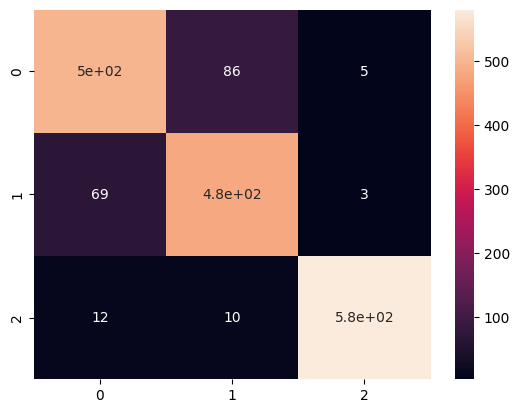

In [58]:
# evaluate model
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_val)
print(classification_report(y_val, y_pred))

sns.heatmap(confusion_matrix(y_pred, y_val), annot=True)

# Using Flaml

In [65]:
from flaml import AutoML

model = AutoML(task='classification', time_budget=60, metric='micro_f1', log_file_name = 'mylog.log')

model.fit(x_train, y_train)

[flaml.automl: 02-09 18:36:41] {2599} INFO - task = classification
[flaml.automl: 02-09 18:36:41] {2601} INFO - Data split method: stratified
[flaml.automl: 02-09 18:36:41] {2604} INFO - Evaluation method: holdout
[flaml.automl: 02-09 18:36:41] {2726} INFO - Minimizing error metric: 1-micro_f1
[flaml.automl: 02-09 18:36:41] {2870} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 02-09 18:36:41] {3166} INFO - iteration 0, current learner lgbm
[flaml.automl: 02-09 18:36:41] {3296} INFO - Estimated sufficient time budget=880s. Estimated necessary time budget=20s.
[flaml.automl: 02-09 18:36:41] {3343} INFO -  at 0.2s,	estimator lgbm's best error=0.3817,	best estimator lgbm's best error=0.3817
[flaml.automl: 02-09 18:36:41] {3166} INFO - iteration 1, current learner lgbm
[flaml.automl: 02-09 18:36:41] {3343} INFO -  at 0.3s,	estimator lgbm's best error=0.3817,	best estimator lgbm's best error=0.3817
[flaml.automl: 02-

[flaml.automl: 02-09 18:36:52] {3166} INFO - iteration 36, current learner xgboost
[flaml.automl: 02-09 18:36:52] {3343} INFO -  at 11.6s,	estimator xgboost's best error=0.1800,	best estimator lgbm's best error=0.0916
[flaml.automl: 02-09 18:36:52] {3166} INFO - iteration 37, current learner xgboost
[flaml.automl: 02-09 18:36:52] {3343} INFO -  at 11.8s,	estimator xgboost's best error=0.1800,	best estimator lgbm's best error=0.0916
[flaml.automl: 02-09 18:36:52] {3166} INFO - iteration 38, current learner xgboost
[flaml.automl: 02-09 18:36:53] {3343} INFO -  at 12.1s,	estimator xgboost's best error=0.1800,	best estimator lgbm's best error=0.0916
[flaml.automl: 02-09 18:36:53] {3166} INFO - iteration 39, current learner lgbm
[flaml.automl: 02-09 18:36:56] {3343} INFO -  at 15.6s,	estimator lgbm's best error=0.0916,	best estimator lgbm's best error=0.0916
[flaml.automl: 02-09 18:36:56] {3166} INFO - iteration 40, current learner xgboost
[flaml.automl: 02-09 18:36:56] {3343} INFO -  at 15

[flaml.automl: 02-09 18:37:20] {3166} INFO - iteration 74, current learner xgb_limitdepth
[flaml.automl: 02-09 18:37:21] {3343} INFO -  at 40.1s,	estimator xgb_limitdepth's best error=0.1151,	best estimator lgbm's best error=0.0916
[flaml.automl: 02-09 18:37:21] {3166} INFO - iteration 75, current learner xgb_limitdepth
[flaml.automl: 02-09 18:37:22] {3343} INFO -  at 41.1s,	estimator xgb_limitdepth's best error=0.1151,	best estimator lgbm's best error=0.0916
[flaml.automl: 02-09 18:37:22] {3166} INFO - iteration 76, current learner rf
[flaml.automl: 02-09 18:37:22] {3343} INFO -  at 41.2s,	estimator rf's best error=0.2137,	best estimator lgbm's best error=0.0916
[flaml.automl: 02-09 18:37:22] {3166} INFO - iteration 77, current learner rf
[flaml.automl: 02-09 18:37:22] {3343} INFO -  at 41.4s,	estimator rf's best error=0.2137,	best estimator lgbm's best error=0.0916
[flaml.automl: 02-09 18:37:22] {3166} INFO - iteration 78, current learner xgboost
[flaml.automl: 02-09 18:37:23] {3343}

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       578
           1       0.88      0.87      0.87       578
           2       0.99      0.98      0.99       588

    accuracy                           0.91      1744
   macro avg       0.91      0.91      0.91      1744
weighted avg       0.91      0.91      0.91      1744



<AxesSubplot: >

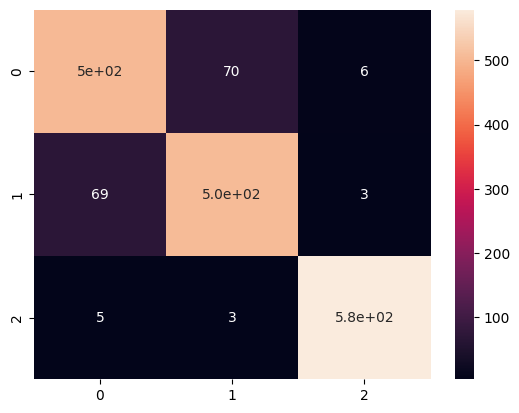

In [66]:
# evaluate model
y_pred = model.predict(x_val)
print(classification_report(y_val, y_pred))

sns.heatmap(confusion_matrix(y_pred, y_val), annot=True)